# **Modelamiento, Evaluación e Interpretación**
### *Implementación De Un Modelo De Recomendación Para Compra o Venta de Acciones En El Mercado Financiero Basado en Análisis De Sentimiento*

[Robert Garcia Rey](https://www.notion.so/Robert-Garcia-Rey-Data-Analyst-6d7b578d2bf848d585dc9d1a97b1036c?pvs=4)
- garcia.robert.0514@eam.edu.co
- https://www.linkedin.com/in/robert-garcia-rey/

## **1. Modelado**

### 1.1 Selección del Modelo

En el presente apartado se trabaja la etapa de modelado (construcción del modelo, evaluación e interpretación) para extraer información valiosa de los datos, para el presente proyecto realizaremos un exploración con tres modelos diferentes de clasificación:

- Arbol de decisión
- SVM
- Regresión Logística
- KNeighbors Classifier

Y finalmente tendrá como objetivo escoger el que mejor metrica de desempeño arroje según modelo.

### 1.2 Importamos librerias

In [1]:
#Manipulación y visualización de datos
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math
import datetime
import re
import unicodedata
import warnings
from datetime import date, timedelta
warnings.filterwarnings('ignore')

#Modelado
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#Hiperparametrización
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale

pd.pandas.set_option('display.max_columns', None)

### 1.3 Importar datos

Leemos los datos de los guardados para el modelo

In [7]:
#Asignamos el set de datos
data = pd.read_csv("../data/processed/data_processed_modeling.csv")
print(data.shape)
#Leemos el head del dataset
data.head()

(522, 6)


,Open,Subjectivity,negative,neutral,positive,label
0,341.61,0.473276,0.000000,0.318077,0.681923,1
1,335.53,0.447803,0.336256,0.269949,0.393795,0
2,328.58,0.388048,0.146736,0.392092,0.461172,1
3,329.74,0.430650,0.404048,0.406286,0.189666,1
4,337.00,0.376437,0.066893,0.415530,0.517577,0


### Normalizamos los datos

In [8]:
#Normalizacion de datos
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0,1))
data[['Open']] = min_max_scaler.fit_transform(data[['Open']])
data

,Open,Subjectivity,negative,neutral,positive,label
0,0.887137,0.473276,0.000000,0.318077,0.681923,1
1,0.865693,0.447803,0.336256,0.269949,0.393795,0
2,0.841181,0.388048,0.146736,0.392092,0.461172,1
3,0.845272,0.430650,0.404048,0.406286,0.189666,1
4,0.870878,0.376437,0.066893,0.415530,0.517577,0
...,...,...,...,...,...,...
517,0.095629,0.411918,0.000000,0.498333,0.501667,0
518,0.971861,0.411171,0.152160,0.449702,0.398138,0
519,0.254900,0.399705,0.137155,0.267236,0.595609,0
520,0.877683,0.473161,0.069754,0.240731,0.689515,0


### 1.4 División 70 - 30

En este apartado se realiza la **división 70-30** del dataset **"data"** cuyo objetivo principal permitir el entrenamiento y la evaluación efectiva de modelos de clasificación. Se  separaran los datos en dos conjuntos distintos: un conjunto de entrenamiento (70%) y un conjunto de prueba (30%) en pro de mejorar la capacidad de los modelos de clasificación para generalizar a datos no vistos y se facilita la evaluación de su rendimiento:

<Axes: xlabel='label'>

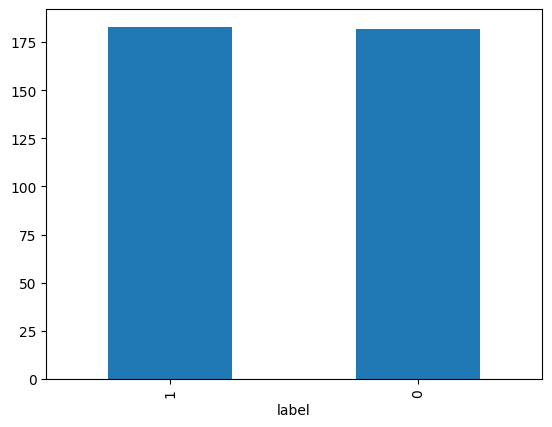

In [9]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data.drop("label", axis = 1) # En X se guarda todo el dataset (Variables predictoras) salvo la variable objetivo "label".
Y = data['label'] # En Y se almacena la variable objetivo "label".
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42) # M Se realizará un muestreo estratificado.
Y_train.value_counts().plot(kind='bar') # Graficamos los datos de entrenamiento de la variable objetivo.

### 1.4 Hiperparametrización con el 70%

En el siguiente apartado; se procede a realizar hiperparametrización **conjunto de datos de entrenamiento (70%)** para los modelos de:

- Arbol de decisión
- SVM
- Regresión Logística
- KNeighbors Classifier

Se inicia la primera prueba con parametros aleatorios

#### ***Hiperparametrización Arbol de Decisión***

In [21]:
#  Arbol
from sklearn.tree import DecisionTreeClassifier
modelTree = DecisionTreeClassifier()

# Definir los hiperparametros
criterion=['entropy','gini'] #Indice de información
min_samples_leaf=[2,10,50,100] # Cantidad de registros por hoja
max_depth=[None, 10,20,50] #Niveles de profundidad

#Grid
param_grid = dict(criterion=criterion, min_samples_leaf=min_samples_leaf, max_depth=max_depth)
grid = GridSearchCV(estimator=modelTree, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)
grid.fit(X_train, Y_train) #70%

#Mejor modelo
modelTree_1 = grid.best_estimator_

#Medida de evaluación del mejor modelo
medidas= pd.DataFrame(index=['f1 de la CV'])
medidas['Tree_1']=grid.best_score_

# Mejores párametros
print( grid.best_params_)
print(medidas)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 10}
               Tree_1
f1 de la CV  0.520753


Interpretación de la primera prueba con parametros aleatorios:

* **criterion**: 'entropy': la cual mide la impureza de un conjunto de datos y se utiliza para cuantificar la incertidumbre en la clasificación.

* **max_depth**: 20: Establecer un límite de profundidad máxima de 20 puede estar ayudando a prevenir un sobreajuste excesivo, aunque el efecto de este límite en el rendimiento parece ser limitado. Es posible que el árbol no necesite alcanzar esta profundidad máxima para clasificar los datos efectivamente.

* **min_samples_leaf**: 10: Parámetro que establece el número mínimo de muestras que debe haber en una hoja del árbol. En este caso, se ha configurado para que haya al menos 10 muestras en cada hoja.

La métrica que sigue a esta configuración de hiperparámetros es:

* **f1 de la CV 0.52**: Esta métrica 'f1' representa la precisión y sensibilidad/recall del modelo. En este caso, la puntuación F1 calculada en una validación cruzada (CV) es 0.519591 lo cual sugiere que, aunque el modelo tiene un rendimiento aceptable, podría haber espacio para mejoras, ya sea a través de un ajuste adicional de los parámetros, la inclusión de más características informativas, o incluso considerando diferentes tipos de modelos.

Segunda prueba reduciendo la escala de valores colocados anteriormente

In [22]:
#  Arbol

modelTree = DecisionTreeClassifier()

# Definir los hiperparametros
criterion=['entropy','gini'] #Indice de información
min_samples_leaf=[5, 40, 50, 55] # Cantidad de registros por hoja
max_depth=[2, 6, 7, 8] #Niveles de profundidad

#Grid
param_grid = dict(criterion=criterion, min_samples_leaf=min_samples_leaf, max_depth=max_depth)
grid = GridSearchCV(estimator=modelTree, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)
grid.fit(X_train, Y_train) #70%

#Mejor modelo
modelTree_2 = grid.best_estimator_

#Medida de evaluación del mejor modelo
medidas= pd.DataFrame(index=['f1 de la CV'])
medidas['Tree']=grid.best_score_

# Mejores párametros
print( grid.best_params_)
print(medidas)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}
                 Tree
f1 de la CV  0.521868


Interpretación de la segunda prueba con parametros aleatorios:

* **criterion**: 'gini': Se ha cambiado el criterio a 'gini', que mide la impureza de una división, siendo un enfoque común y efectivo en árboles de decisión. El índice de Gini es una medida rápida y puede ser preferible para conjuntos de datos con muchas clases. La elección del índice de Gini sugiere un enfoque ligeramente diferente en la forma en que el modelo está evaluando y realizando divisiones, enfocándose en minimizar la probabilidad de clasificación errónea.

* **max_depth**: 2: Establecer una profundidad máxima de 2 es una restricción significativa, lo que limita la complejidad del árbol. Esto evita el sobreajuste pero también puede limitar la capacidad del modelo para capturar la complejidad de los datos. Una profundidad tan baja sugiere que el modelo está siendo muy conservador en su enfoque, lo que podría ser útil si los datos son relativamente simples o si se busca un modelo muy generalizable.

* **min_samples_leaf**: 5: Al igual que en configuraciones anteriores, este valor ayuda a garantizar que cada hoja del árbol tenga suficientes datos, contribuyendo a la robustez del modelo. Un min_samples_leaf de 5, combinado con una profundidad máxima baja, sugiere un enfoque muy cauteloso que evita divisiones basadas en pequeñas agrupaciones de datos.

La métrica que sigue a esta configuración de hiperparámetros es:

* **f1 de la CV 0.521868**: Esta métrica 'f1' representa un calculo de la puntuación F1 en una validación cruzada (CV) en un valor de 0.521868, Un puntaje F1 similar a las configuraciones anteriores indica un rendimiento moderado. Este resultado sugiere que, a pesar de los cambios significativos en los parámetros, el modelo está operando a un nivel de rendimiento comparable. Este resultado puede indicar que los ajustes a los hiperparámetros están teniendo un impacto limitado y que podrían ser necesarias otras formas de optimización, como la ingeniería de características o la experimentación con otros tipos de modelos.

Tercera prueba reduciendo la escala de valores colocados anteriormente

In [36]:
#  Arbol

modelTree = DecisionTreeClassifier()

# Definir los hiperparametros
criterion=['entropy','gini'] #Indice de información
min_samples_leaf=[6,7,8,9] # Cantidad de registros por hoja
max_depth=[5, 6, 7, 8] #Niveles de profundidad

#Grid
param_grid = dict(criterion=criterion, min_samples_leaf=min_samples_leaf, max_depth=max_depth)
grid = GridSearchCV(estimator=modelTree, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)
grid.fit(X_train, Y_train) #70%

#Mejor modelo
modelTree_3 = grid.best_estimator_

#Medida de evaluación del mejor modelo
medidas= pd.DataFrame(index=['f1 de la CV'])
medidas['Tree_3']=grid.best_score_

# Mejores párametros
print( grid.best_params_)
print(medidas)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 8}
               Tree_3
f1 de la CV  0.521915


Interpretación de la segunda prueba con parametros aleatorios:

* **criterion**: 'entropy': Se Regresa al criterio de 'entropy', que es efectivo para dividir los nodos del árbol basado en la ganancia de información. La 'entropy' es útil para crear árboles de decisión que reflejen cómo se distribuyen las clases en cada nodo. Esta elección implica que el modelo está buscando maximizar la ganancia de información en cada división, lo cual es especialmente útil cuando las divisiones claras en los datos no son evidentes.

* **max_depth**: 8: Un límite de profundidad de 8 es un enfoque equilibrado, lo que permite cierta complejidad en el árbol sin correr un alto riesgo de sobreajuste. Esta profundidad permite al árbol capturar más detalles de los datos en comparación con una profundidad más baja. Este ajuste sugiere que el modelo está tratando de encontrar un equilibrio entre un árbol demasiado simplificado y uno excesivamente complejo.

* **min_samples_leaf**: 8: Al establecer min_samples_leaf en 8, el modelo evita crear hojas basadas en un número muy pequeño de muestras, lo que ayuda a mejorar la generalización y la robustez. Un min_samples_leaf de 8 ayuda a prevenir el sobreajuste, asegurando que las divisiones estén respaldadas por un número suficiente de observaciones.

La métrica que sigue a esta configuración de hiperparámetros es:

* **f1 de la CV 0.521915**: Un puntaje F1 ligeramente mejor indica un rendimiento moderado. Este valor sugiere un equilibrio entre precisión y sensibilidad (recall), lo que es crucial en la evaluación de modelos de clasificación. Este nivel de rendimiento, aunque similar a configuraciones anteriores, muestra que ajustes menores en la profundidad y en el número mínimo de muestras por hoja pueden tener un impacto positivo, aunque limitado, en el rendimiento del modelo.

Observamos que el modelo sigue estable aun cambiando los parametros, por ende se seleccionan estos últimos hiperparametros:

- 'criterion': 'entropy'
- 'max_depth': 8
- 'min_samples_leaf': 8

obteniendo un f1 score de 0.521915

A continuación gráficamos nuestro arbol según mejor hiperparametrización obtenida:

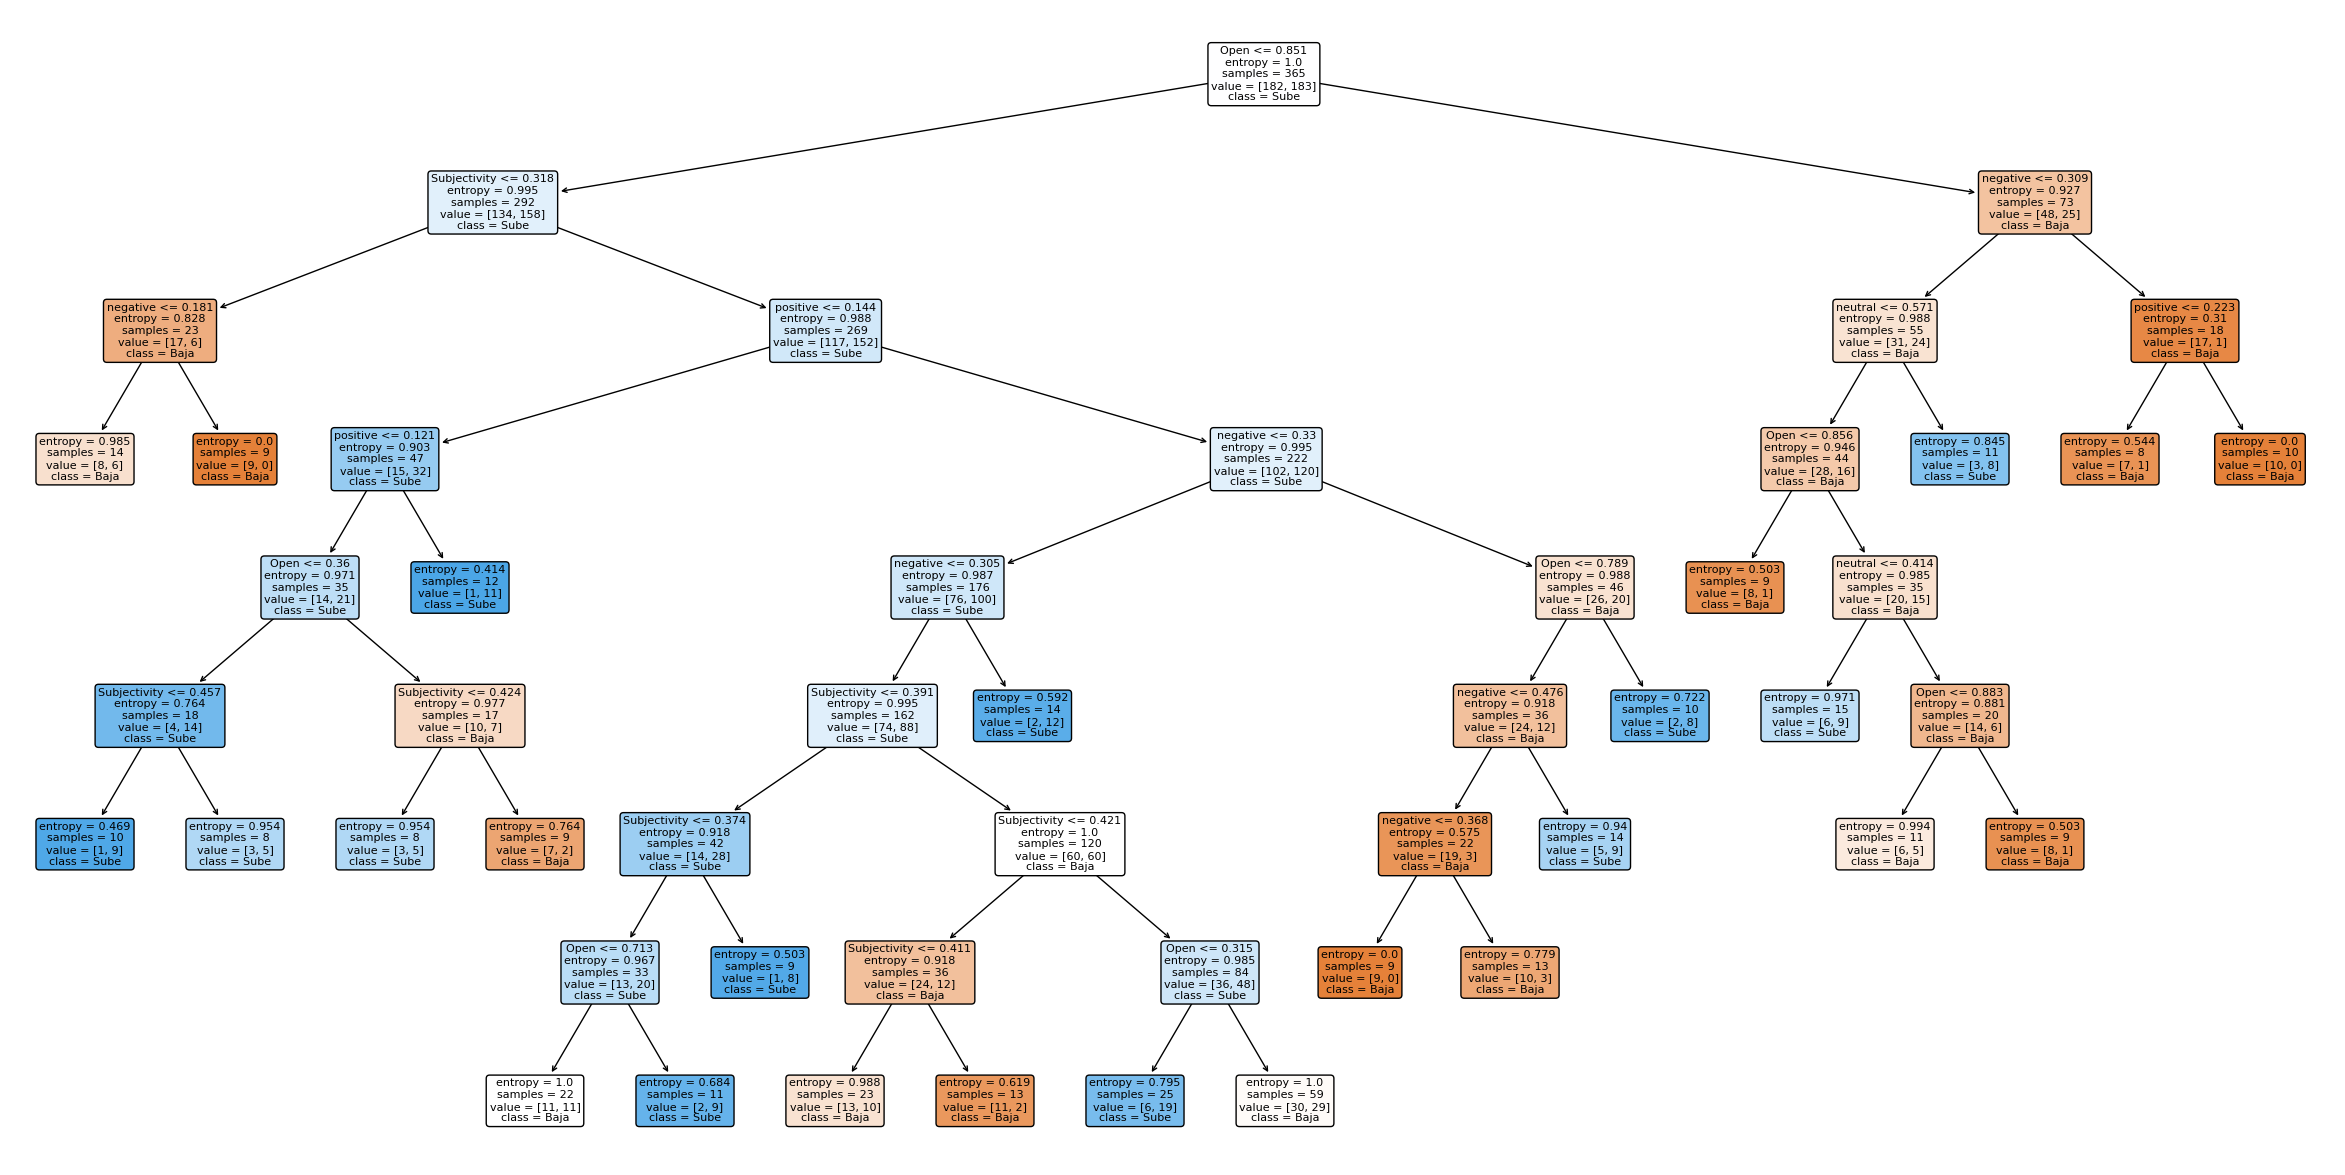

In [37]:
#Mejor modelo
from sklearn.tree import plot_tree
plt.figure(figsize=(30,15))
plot_tree(modelTree_3, feature_names=X_train.columns.values, class_names=['Baja', 'Sube'], rounded=True, filled=True, fontsize=8)
plt.show()

#### ***Hiperparametrización SVM***

Se inicia la primera prueba con parametros aleatorios

In [38]:
#SVM
from sklearn.svm import SVC
modelSVM = SVC()

# Definir los hiperparametros
C=[0.1,1,10] #Margen blando
kernel=['linear'] #'linear', 'poly', 'rbf', 'sigmoid'
gamma=['scale']

#Grid
param_grid = dict(C=C, kernel=kernel,gamma=gamma)
grid = GridSearchCV(estimator=modelSVM, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)
grid.fit(X_train, Y_train)

#Mejor modelo
modelSVM_1 = grid.best_estimator_

#Medida de evaluación del mejor modelo
medidas= pd.DataFrame(index=['f1 de la CV'])
medidas['SVM']=grid.best_score_

# Mejores párametros
print( grid.best_params_)

print(medidas)

{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
                  SVM
f1 de la CV  0.520123


Interperación de la primera prueba con parametros Aleatorios y métrica asociada:

**'C': 10**: El parámetro C en SVM controla el grado de penalización para clasificaciones incorrectas. Un valor de 10 indica una regularización moderada. Un valor más alto de C implica una menor tolerancia a errores de clasificación, lo que puede llevar a un modelo más ajustado a los datos de entrenamiento (potencial sobreajuste). Un C de 10 sugiere un balance entre la adaptación a los datos y la prevención del sobreajuste, aunque el modelo puede seguir siendo sensible a las peculiaridades de los datos de entrenamiento.

**'gamma': 'scale'**: El parámetro gamma define la influencia de un solo ejemplo de entrenamiento. Con gamma='scale', el valor se ajusta automáticamente basándose en el número de características, lo que suele ser una buena opción por defecto. Dado que se está usando un kernel linear, el efecto de gamma es menos relevante. gamma es más crítico en kernels no lineales como rbf.

**'kernel': 'linear'**: Se ha seleccionado el kernel linear, que es efectivo para datos que son linealmente separables o casi linealmente separables. Es un enfoque simple y a menudo efectivo para varios problemas de clasificación. La elección del kernel linear indica que para nuestros datos, las relaciones lineales entre las características son suficientes para realizar la clasificación.

La métrica que sigue a esta configuración de hiperparámetros es:

**f1 de la CV 0.520123**: En este caso un puntaje F1 de aproximadamente 0.52 indica un rendimiento moderado. Esto sugiere que, aunque el modelo tiene cierta capacidad para clasificar correctamente, hay espacio para mejorar. Este nivel de rendimiento podría ser adecuado dependiendo de la naturaleza de los datos y de los objetivos específicos.

Intentamos con otro Kernel y experimentar con un rango más amplio de valores para C, tanto más bajos (como 0.01, 0.05) para aumentar la regularización, como más altos (como 20, 50) para reducir la regularización.

In [41]:
#SVM
from sklearn.svm import SVC
modelSVM = SVC()

# Definir los hiperparametros
C=[20, 30, 40, 50] #Margen blando
kernel=['rbf'] #'linear', 'poly', 'rbf', 'sigmoid'
gamma=['scale']

#Grid
param_grid = dict(C=C, kernel=kernel,gamma=gamma)
grid = GridSearchCV(estimator=modelSVM, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)
grid.fit(X_train, Y_train)

#Mejor modelo
modelSVM_2 = grid.best_estimator_

#Medida de evaluación del mejor modelo
medidas= pd.DataFrame(index=['f1 de la CV'])
medidas['SVM']=grid.best_score_

# Mejores párametros
print( grid.best_params_)

print(medidas)

{'C': 30, 'gamma': 'scale', 'kernel': 'rbf'}
                  SVM
f1 de la CV  0.488421


Interprtación de la segunda prueba con parametro Kernel: **"rbf"** Aleatorios y métrica asociada:

* **'C': 30**: El valor aumentado de C a 30 implica una menor regularización y una mayor penalización de clasificaciones incorrectas. Esto puede llevar a un modelo más ajustado a los datos de entrenamiento, pero también aumenta el riesgo de sobreajuste. Un C más alto sugiere que el modelo está intentando capturar más detalles de los datos, lo que puede ser útil si tus datos son complejos, pero también puede hacer que el modelo sea menos generalizable.

* **'gamma': 'scale'**: Al igual que en la configuración anterior, el uso de gamma='scale' ajusta automáticamente el valor de gamma en función del número de características, lo cual es generalmente una buena práctica. En un kernel rbf, el parámetro gamma juega un papel crucial. Controla la influencia de un solo ejemplo de entrenamiento, con valores más bajos que significan 'influencia lejana' y valores más altos que resultan en 'influencia cercana'.

* **'kernel': 'rbf'**: El cambio al kernel rbf (Radial Basis Function) indica un intento de capturar relaciones no lineales en los datos. El kernel rbf es potente para mapear entradas en espacios de mayor dimensión, lo que es útil para conjuntos de datos donde las relaciones lineales no son suficientes. La elección del kernel rbf puede ser beneficiosa si tus datos tienen relaciones no lineales complejas. Sin embargo, el hecho de que el rendimiento haya disminuido sugiere que este modelo puede estar sobreajustando los datos o que las relaciones no lineales no son tan pronunciadas en los datos.

La métrica que sigue a esta configuración de hiperparámetros es:

* **f1 de la CV 0.488421**: Un puntaje F1 de aproximadamente 0.49 es inferior al obtenido con el kernel linear. Esto sugiere que, para nuestros datos específicos, un enfoque lineal podría ser más adecuado o que los hiperparámetros del modelo rbf necesitan un ajuste más fino. Este rendimiento más bajo podría ser un indicador de que la configuración actual del modelo rbf no es la óptima para nuestros datos, o que los datos son más adecuados para un modelo lineal.

Disminuyó el resultado de acuerdo al anterior, intentamos con otro Kernel **"poly"**:

In [42]:
#SVM
from sklearn.svm import SVC
modelSVM = SVC()

# Definir los hiperparametros
C=[10,20,30,40,50] #Margen blando
kernel=['poly'] #'linear', 'poly', 'rbf', 'sigmoid'
gamma=['scale']

#Grid
param_grid = dict(C=C, kernel=kernel,gamma=gamma)
grid = GridSearchCV(estimator=modelSVM, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)
grid.fit(X_train, Y_train)

#Mejor modelo
modelSVM_3 = grid.best_estimator_

#Medida de evaluación del mejor modelo
medidas= pd.DataFrame(index=['f1 de la CV'])
medidas['SVM']=grid.best_score_

# Mejores párametros
print( grid.best_params_)

print(medidas)

{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
                  SVM
f1 de la CV  0.476426


Interprtación de la segunda prueba con parametro Kernel: **"poly"** Aleatorios y métrica asociada:

* **'C': 10**: Un C de 10 implica una regularización moderada en el modelo. Aunque es más bajo que el valor que se uso con el kernel rbf, sigue siendo relativamente alto, lo que sugiere una menor tolerancia a errores de clasificación. Este valor de C indica un intento de equilibrar el ajuste a los datos de entrenamiento con la generalización, aunque el rendimiento indica que puede estar habiendo cierto grado de sobreajuste o inadecuación del modelo para los datos.
  
* **'gamma': 'scale'**: Al igual que en las configuraciones anteriores, el uso de gamma='scale' ajusta automáticamente este parámetro en función del número de características. Es una buena práctica general para el kernel poly. En el kernel poly, gamma influye en la complejidad de la función polinomial utilizada para mapear el espacio de entrada. Un valor 'scale' proporciona un ajuste equilibrado, pero su efectividad depende de la naturaleza de los datos.

* **'kernel': 'poly'**: El kernel polinómico permite al modelo capturar relaciones no lineales más complejas a través de combinaciones polinómicas de las características de entrada. Es útil para conjuntos de datos donde las interacciones entre características son importantes. La elección del kernel poly sugiere un intento de modelar interacciones no lineales complejas. Sin embargo, el rendimiento más bajo en comparación con los kernels linear y rbf podría indicar que este tipo de relaciones no está tan presente en nuestros datos.

La métrica que sigue a esta configuración de hiperparámetros es:

* **f1 de la CV 0.476426**: Un puntaje F1 de aproximadamente 0.48 es el más bajo hasta ahora en tus pruebas con SVM. Esto sugiere que el modelo no está clasificando tan efectivamente como con los otros kernels. Este resultado podría ser un indicador de que la naturaleza de los datos no se alinea bien con las capacidades del kernel poly o que los parámetros del modelo necesitan un ajuste más detallado.

Intentamos con el Kernel 'sigmoid' en una tercer prueba:

In [43]:
#SVM
from sklearn.svm import SVC
modelSVM = SVC()

# Definir los hiperparametros
C=[10,20,30,40,50] #Margen blando
kernel=['sigmoid'] #'linear', 'poly', 'rbf', 'sigmoid'
gamma=['scale']

#Grid
param_grid = dict(C=C, kernel=kernel,gamma=gamma)
grid = GridSearchCV(estimator=modelSVM, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)
grid.fit(X_train, Y_train)

#Mejor modelo
modelSVM_4 = grid.best_estimator_

#Medida de evaluación del mejor modelo
medidas= pd.DataFrame(index=['f1 de la CV'])
medidas['SVM']=grid.best_score_

# Mejores párametros
print( grid.best_params_)

print(medidas)

{'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
                  SVM
f1 de la CV  0.525138


Interprtación de la segunda prueba con parametro Kernel: **"sigmoid"** Aleatorios y métrica asociada:

* **'C': 10**: Al igual que en configuraciones anteriores, un C de 10 indica una regularización moderada. Esto sugiere un balance entre la adaptación a los datos de entrenamiento y la prevención del sobreajuste. La elección de este valor sugiere que el modelo necesita cierto grado de flexibilidad para ajustarse a los datos, pero no en exceso, lo que podría llevar a sobreajustarse a las peculiaridades de los datos de entrenamiento.
  
* **'gamma': 'scale'**: Al usar gamma='scale', el valor de gamma se ajusta automáticamente en función del número de características en tus datos. Esto generalmente proporciona un buen balance para el kernel sigmoid. En el kernel sigmoid, el gamma afecta la forma de la función sigmoide utilizada para la decisión. Un valor 'scale' proporciona un ajuste equilibrado y es útil cuando no se tiene una idea previa de qué valor podría ser el más adecuado.

* **'kernel': 'sigmoid'**: El kernel sigmoid convierte el espacio de características en un espacio sigmoide, similar a una red neuronal. Este kernel puede ser útil para problemas donde se desea modelar comportamientos no lineales complejos, pero no tan extremos como los capturados por los kernels poly o rbf. La elección del kernel sigmoid puede ser efectiva para capturar ciertas no linealidades en los datos. Sin embargo, este kernel a veces es menos común en SVM para tareas de clasificación y puede ser más sensible a la elección de hiperparámetros.

La métrica que sigue a esta configuración de hiperparámetros es:

* **f1 de la CV 0.525138**: Un puntaje F1 de aproximadamente 0.53 es ligeramente mejor que algunos de los resultados anteriores, pero todavía indica un rendimiento moderado. Esto sugiere que el modelo es capaz de clasificar con cierta eficacia, pero aún hay margen para mejorar. Este resultado podría ser adecuado dependiendo de los objetivos y la naturaleza de los datos.

Intentamos por ultimo con el Kernel 'linear' y los nuevos margen blando:

In [51]:
#SVM
from sklearn.svm import SVC
modelSVM = SVC()

# Definir los hiperparametros
C=[5,7,9,12]#Margen blando
kernel=['linear'] #'linear', 'poly', 'rbf', 'sigmoid'
gamma=['scale']

#Grid
param_grid = dict(C=C, kernel=kernel,gamma=gamma)
grid = GridSearchCV(estimator=modelSVM, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)
grid.fit(X_train, Y_train)

#Mejor modelo
modelSVM_5 = grid.best_estimator_

#Medida de evaluación del mejor modelo
medidas= pd.DataFrame(index=['f1 de la CV'])
medidas['SVM']=grid.best_score_

# Mejores párametros
print( grid.best_params_)

print(medidas)

{'C': 5, 'gamma': 'scale', 'kernel': 'linear'}
                  SVM
f1 de la CV  0.526882


Interprtación de la segunda prueba con parametro Kernel: **"linear"** Aleatorios y métrica asociada:

* **'C': 5**: Al reducir C a 5, estás aumentando la regularización del modelo, lo cual puede ayudar a prevenir el sobreajuste. Un C más bajo significa que el modelo está menos ajustado a las peculiaridades de los datos de entrenamiento y más enfocado en encontrar una regla de decisión generalizable. La mejora en el puntaje F1 sugiere que una regularización más fuerte está beneficiando al modelo en términos de generalización, aunque el incremento es marginal.
  
* **'gamma': 'scale'**: Al igual que el caso anterior; para este caso; el parámetro 'gamma' que afecta la forma en que el modelo considera la influencia de cada ejemplo de entrenamiento en la construcción de la frontera de decisión se ha configurado en el valor: 'Scale' el cuál es una opción común que significa que 'gamma' se establece en 1 / (número de características * varianza de los datos). Esto ayuda a adaptar 'gamma' en función de la escala y la variabilidad de los datos.

* **'kernel': 'linear'**: Para este caso se ha seleccionado nuevamente el kernel linear, esta mostrando un buen rendimiento, sugiere que nuestros datos podrían ser linealmente separables o que las relaciones lineales son predominantes en los datos.

La métrica que sigue a esta configuración de hiperparámetros es:

* **f1 de la CV 0.526882**: Un puntaje F1 ligeramente superior al obtenido al anterior sugiere un rendimiento moderado del modelo. Aunque la mejora es pequeña, indica un equilibrio efectivo entre precisión y sensibilidad (recall). Este resultado puede ser adecuado dependiendo de la naturaleza de tus datos y tus objetivos específicos. Si bien muestra una mejora, el aumento es modesto, lo que sugiere que podrías estar acercándote al límite de rendimiento con este enfoque.

De las pruebas anterior concluimos que para el modelo de clasificación SVM los mejores hiperparametros son:

- **C: 5**
- **gamma: 'scale'**
- **kernel: 'linear'**

Obteniendo un f1 score de  **0.53**

La mejora continua, aunque pequeña, en el puntaje F1 indica que se esta en el camino correcto con el ajuste de los hiperparámetros. Sin embargo, dado que los incrementos son modestos, podría ser valioso explorar otras áreas de optimización, como la ingeniería de características y el preprocesamiento de datos, para obtener mejoras más significativas en el rendimiento del modelo.

#### ***Hiperparametrización para Regresión Logística***

Primer caso; iniciamos con parametros aleatorios:

In [52]:
from sklearn.linear_model import LogisticRegression

# Crear un modelo de regresión logística
modelLogistic = LogisticRegression()

# Definir los hiperparámetros
penalty = ['l1', 'l2']  # Tipo de penalización
C = [0.001, 0.01, 0.1, 1, 10, 100]  # Parámetro de regularización

# Crear un diccionario con los hiperparámetros
param_grid = {'penalty': penalty, 'C': C}

# Crear un objeto GridSearchCV
grid = GridSearchCV(estimator=modelLogistic, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)

# Ajustar el modelo de regresión logística
grid.fit(X_train, Y_train)

# Mejor modelo
modelLogistic_1 = grid.best_estimator_

# Medida de evaluación del mejor modelo
medidas = pd.DataFrame(index=['f1 de la CV'])
medidas['Logistic'] = grid.best_score_

# Mejores párametros
print(grid.best_params_)
print(medidas)

{'C': 10, 'penalty': 'l2'}
             Logistic
f1 de la CV  0.553334


Intepretación del resultado obtenido para esteprimer caso:

* **'C': 10**:Un C de 10 indica un nivel de regularización moderado. En la regresión logística, un valor más alto de C corresponde a menos regularización. Esto significa que el modelo tiene un margen más estrecho para clasificaciones incorrectas y está más ajustado a los datos de entrenamiento. El uso de un C de 10 sugiere que el modelo necesita cierta flexibilidad para ajustarse a los datos, pero sin llegar al extremo de un sobreajuste significativo. Esto puede ser beneficioso si los datos son complejos y requieren un modelo que pueda capturar estas complejidades.

* **'penalty': 'l2'**: La penalización l2 en la regresión logística agrega un término de regularización que penaliza los coeficientes grandes en la función de coste, lo que ayuda a prevenir el sobreajuste y mejora la generalización del modelo. La elección de una penalización l2 indica un enfoque de regularización que promueve un modelo más suavizado, evitando que ciertas características tengan un peso excesivamente grande en la decisión final.

La métrica que sigue a esta configuración de hiperparámetros es:

* **f1 de la CV 0.553334**: Un puntaje F1 de aproximadamente 0.55 muestra un rendimiento moderado del modelo. Este valor sugiere un equilibrio efectivo entre precisión y sensibilidad (recall), lo cual es crucial en la evaluación de modelos de clasificación.

En un segundo caso reducimos el rango de variables para encontrar los mejores hiperparametros:

In [55]:
from sklearn.linear_model import LogisticRegression

# Crear un modelo de regresión logística
modelLogistic = LogisticRegression()

# Definir los hiperparámetros
penalty = ['l1', 'l2']  # Tipo de penalización
C = [15, 20, 30, 40, 50]  # Parámetro de regularización

# Crear un diccionario con los hiperparámetros
param_grid = {'penalty': penalty, 'C': C}

# Crear un objeto GridSearchCV
grid = GridSearchCV(estimator=modelLogistic, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)

# Ajustar el modelo de regresión logística
grid.fit(X_train, Y_train)

# Mejor modelo
modelLogistic_2 = grid.best_estimator_

# Medida de evaluación del mejor modelo
medidas = pd.DataFrame(index=['f1 de la CV'])
medidas['Logistic'] = grid.best_score_

# Mejores párametros
print(grid.best_params_)
print(medidas)

{'C': 15, 'penalty': 'l2'}
             Logistic
f1 de la CV  0.558665


Intepretación del resultado obtenido para este segundo caso:

* **'C': 15**: Un C de 15 indica una regularización ligeramente menor en comparación con un C de 10. Esto sugiere que el modelo está menos restringido y puede ajustarse más a las peculiaridades de los datos de entrenamiento, lo cual puede ser beneficioso si tus datos tienen una estructura compleja. El incremento en el puntaje F1 sugiere que una menor regularización está ayudando al modelo a capturar mejor las relaciones en los datos, lo que se traduce en una mejor clasificación.

* **'penalty': 'l2'**: En este caso; sigue siendo una buena elección, particularmente si te está dando mejores resultados que l1. La penalización l2 ayuda a controlar el sobreajuste penalizando el cuadrado de los coeficientes.

La métrica que sigue a esta configuración de hiperparámetros es:

* **f1 de la CV 0.558665**: Un puntaje F1 de aproximadamente 0.56 es una mejora respecto a la configuración anterior con un C de 10. Esto indica un buen equilibrio entre precisión y sensibilidad (recall), lo que es crucial para la evaluación de modelos de clasificación. Este nivel de rendimiento muestra que el modelo está clasificando de manera efectiva y sugiere que la configuración actual de hiperparámetros es adecuada para los datos.

En el anterior caso hubo una leve mejora, pero intentamos reducir más los valores en este tercer caso:

In [60]:
# Crear un modelo de regresión logística
modelLogistic = LogisticRegression()

# Definir los hiperparámetros
penalty = ['l1', 'l2']  # Tipo de penalización
C = [14, 17, 18, 20] # Parámetro de regularización

# Crear un diccionario con los hiperparámetros
param_grid = {'penalty': penalty, 'C': C}

# Crear un objeto GridSearchCV
grid = GridSearchCV(estimator=modelLogistic, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)

# Ajustar el modelo de regresión logística
grid.fit(X_train, Y_train)

# Mejor modelo
modelLogistic_3 = grid.best_estimator_

# Medida de evaluación del mejor modelo
medidas = pd.DataFrame(index=['f1 de la CV'])
medidas['Logistic'] = grid.best_score_

# Mejores párametros
print(grid.best_params_)
print(medidas)

{'C': 14, 'penalty': 'l2'}
             Logistic
f1 de la CV  0.561549


Intepretación del resultado obtenido para este tercer caso:

* **'C': 14**: Al ajustar C a 14, se está aplicando una regularización ligeramente más fuerte que con C de 15. Este ajuste fino del parámetro sugiere una búsqueda de un equilibrio óptimo entre la adaptación a los datos de entrenamiento y la generalización a datos no vistos. La mejora en el puntaje F1 con un C ligeramente menor sugiere que este nivel de regularización está ayudando al modelo a generalizar mejor sin perder la capacidad de capturar las relaciones subyacentes en los datos.

* **'penalty': 'l2'**: En este caso; sigue siendo una buena elección, particularmente si te está dando mejores resultados que l1. La penalización l2 ayuda a controlar el sobreajuste penalizando el cuadrado de los coeficientes.

La métrica que sigue a esta configuración de hiperparámetros es:

* **f1 de la CV 0.561549**: Un puntaje F1 de aproximadamente 0.56 muestra una mejora y refleja un buen equilibrio entre precisión y sensibilidad. Indica que el modelo está realizando una clasificación efectiva en los datos. Este resultado sugiere que la configuración actual de hiperparámetros es adecuada para nuestros datos, logrando un rendimiento que equilibra correctamente el ajuste y la generalización.

Por lo anterior concluimos que para el modelo de regresión logística los mejores parametros encontrados en las pruebas realizadas fueron:

- **C: 14**
- **penalty: l2**

Obteniendo un f1 score de **0.561549**

#### ***Hiperparametrización para KNeighbors Classifier***

Primer caso; iniciamos con parametros aleatorios:

In [66]:
# Crear un modelo KNeighbors Classifier
modelKNN = KNeighborsClassifier()

# Definir los hiperparámetros
# El número de vecinos
n_neighbors = [3, 5, 10, 15]

# Métrica de distancia
metrics = ['euclidean', 'manhattan', 'minkowski']

# Ponderación de los vecinos
weights = ['uniform', 'distance']

# Crear un diccionario con los hiperparámetros
param_grid = {'n_neighbors': n_neighbors, 'metric': metrics, 'weights': weights}

# Crear un objeto GridSearchCV
grid = GridSearchCV(estimator=modelKNN, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)

# Ajustar el modelo KNeighbors Classifier
grid.fit(X_train, Y_train)

# Mejor modelo
modelKNN_1 = grid.best_estimator_

# Medida de evaluación del mejor modelo
medidas = pd.DataFrame(index=['f1 de la CV'])
medidas['KNN'] = grid.best_score_

# Mejores parámetros
print(grid.best_params_)
print(medidas)

{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
                 KNN
f1 de la CV  0.50084


Intepretación del resultado obtenido para este primer caso:

* **'metric': euclidean**: Se ha elegido la métrica 'euclidean' para calcular la distancia entre los puntos. Es la forma más común y directa de medir la distancia, calculando la raíz cuadrada de la suma de los cuadrados de las diferencias entre las coordenadas. La elección de la distancia euclidiana es efectiva para muchos conjuntos de datos, especialmente cuando las características están en la misma escala. Sin embargo, su efectividad puede variar dependiendo de la naturaleza de los datos.

* **'n_neighbors': '5'**: Un número de vecinos de 5 es un valor comúnmente utilizado en KNN. Significa que el modelo considera los cinco vecinos más cercanos para hacer una predicción. Este número de vecinos proporciona un balance entre tener suficientes datos para tomar una decisión informada y no incluir demasiados datos que podrían introducir ruido. Sin embargo, el rendimiento podría mejorar ajustando este número.

* **'weights': 'uniform'**: Con 'weights' configurado como 'uniform', todos los vecinos contribuyen por igual a la clasificación de un punto de datos. No se da más importancia a los vecinos más cercanos que a los más lejanos dentro de los cinco más cercanos Esta configuración asume que todos los vecinos tienen la misma importancia, lo cual puede no ser óptimo si los vecinos más cercanos son más relevantes para la clasificación.

La métrica que sigue a esta configuración de hiperparámetros es:

* **f1 de la CV 0.50084**: Un puntaje F1 alrededor de 0.50 indica un rendimiento moderado. Este puntaje sugiere que hay un equilibrio entre precisión y sensibilidad, pero también indica que hay margen para mejorar la capacidad del modelo para clasificar con precisión. Este nivel de rendimiento puede ser adecuado dependiendo de tus objetivos y la complejidad de los datos.

En un segundo caso cambiamos de variables para encontrar los mejores hiperparametros:

In [80]:
# Crear un modelo KNeighbors Classifier
modelKNN = KNeighborsClassifier()

# Definir los hiperparámetros
# El número de vecinos
n_neighbors = [3, 4, 5, 6]

# Métrica de distancia
metrics = ['manhattan', 'minkowski']

# Ponderación de los vecinos
weights = ['uniform', 'distance']

# Crear un diccionario con los hiperparámetros
param_grid = {'n_neighbors': n_neighbors, 'metric': metrics, 'weights': weights}

# Crear un objeto GridSearchCV
grid = GridSearchCV(estimator=modelKNN, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)

# Ajustar el modelo KNeighbors Classifier
grid.fit(X_train, Y_train)

# Mejor modelo
modelKNN_2 = grid.best_estimator_

# Medida de evaluación del mejor modelo
medidas = pd.DataFrame(index=['f1 de la CV'])
medidas['KNN'] = grid.best_score_

# Mejores parámetros
print(grid.best_params_)
print(medidas)

{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
                 KNN
f1 de la CV  0.50084


Intepretación del resultado obtenido para este segundo caso:

* **'metric': minkowski**: La métrica de Minkowski es una generalización de otras métricas de distancia. Cuando el parámetro p (no especificado aquí) es 2, la métrica de Minkowski es equivalente a la distancia euclidiana. Por defecto, en muchos sistemas, p se establece en 2 si no se especifica. Al usar 'minkowski' con p igual a 2 (implícito), estás efectivamente utilizando la distancia euclidiana. Esto significa que cada punto se clasifica según la distancia euclidiana promedio a sus vecinos más cercanos.

* **'n_neighbors': '5'**: Un número de vecinos de 5 sigue siendo una elección estándar en KNN, proporcionando un balance entre considerar suficientes vecinos para una clasificación informada y no introducir demasiado ruido. Este número de vecinos intenta capturar la tendencia local sin ser demasiado específico a los datos de entrenamiento, pero el rendimiento moderado sugiere que podría haber margen para ajustes.

* **'weights': 'uniform'**: Al igual que en la configuración anterior, con 'uniform', todos los vecinos dentro de los cinco más cercanos contribuyen por igual a la clasificación, independientemente de su distancia al punto de consulta. Esta configuración implica que la proximidad de los vecinos no afecta su influencia en la clasificación, lo cual podría no ser óptimo si los vecinos más cercanos son más relevantes.

La métrica que sigue a esta configuración de hiperparámetros es:

* **f1 de la CV 0.50084**: Un puntaje F1 de 0.50084 indica un rendimiento moderado, sugiriendo un equilibrio entre precisión y sensibilidad, pero también un espacio significativo para la mejora. Este resultado muestra que la configuración actual proporciona una capacidad de clasificación básica, pero podría beneficiarse de un ajuste más fino o de cambios en la estrategia de ponderación o en el número de vecinos.

Por lo anterior concluimos que para el modelo de KNN los mejores parametros encontrados en las pruebas realizadas fueron:

- **'metric': euclidean**
- **'n_neighbors': '5'**
- **'weights': 'uniform'**

Obteniendo un f1 score de **0.50084**

## **2. Evaluación de los mejores modelos con el 30%**

En este apartado realizaremos la evaluación de modelos con el 30% de los datos, proceso esencial para medir y comparar el rendimiento de los diferentes hiperparametrizados en el aparatado anterior y determinar cuál es el más adecuado para abordar nuestro problema específico de recomendación de venta o compra de acciones. Cabe mencionar que este proceso es fundamental para garantizar que los modelos sean útiles y confiables en la toma de decisiones basadas en datos.

### 2.1 Evaluamos el arbol de desición

In [103]:
y_pred = modelTree_3.predict(X_test)

print("Informe de clasificación:")
print(classification_report(Y_test, y_pred))

#Matriz de confusion
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.58      0.66      0.62        79
           1       0.60      0.51      0.55        78

    accuracy                           0.59       157
   macro avg       0.59      0.59      0.58       157
weighted avg       0.59      0.59      0.58       157

Matriz de confusión:
[[52 27]
 [38 40]]


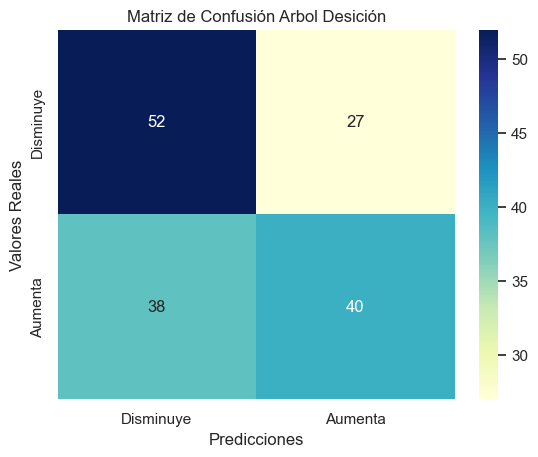

In [104]:
sns.set(font_scale=1)
sns.set_style("dark")

# 0 -> Disminuye (-)
# 1 -> Aumenta (+)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=True,
            xticklabels=['Disminuye', 'Aumenta'],
            yticklabels=['Disminuye', 'Aumenta'])

plt.title('Matriz de Confusión Arbol Desición')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

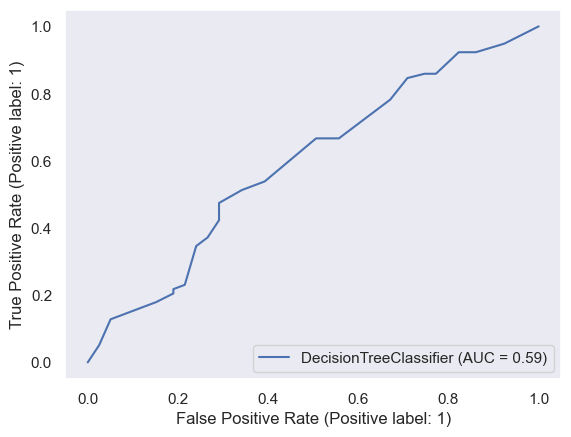

In [105]:
from sklearn.metrics import RocCurveDisplay, classification_report
RocCurveDisplay.from_estimator(modelTree_3, X_test, Y_test)

### 2.2 Evaluamos el el SVM

In [108]:
y_pred_2 = modelSVM_5.predict(X_test)

print("Informe de clasificación:")
print(classification_report(Y_test, y_pred_2))

#Matriz de confusion
conf_matrix_2 = confusion_matrix(Y_test, y_pred_2)
print("Matriz de confusión:")
print(conf_matrix_2)

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.49      0.49      0.49        79
           1       0.49      0.49      0.49        78

    accuracy                           0.49       157
   macro avg       0.49      0.49      0.49       157
weighted avg       0.49      0.49      0.49       157

Matriz de confusión:
[[39 40]
 [40 38]]


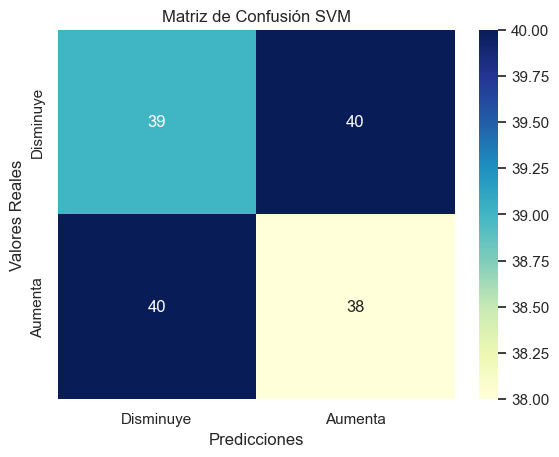

In [107]:
sns.set(font_scale=1)
sns.set_style("dark")

# 0 -> Disminuye (-)
# 1 -> Aumenta (+)

sns.heatmap(conf_matrix_2, annot=True, fmt="d", cmap="YlGnBu", cbar=True,
            xticklabels=['Disminuye', 'Aumenta'],
            yticklabels=['Disminuye', 'Aumenta'])

plt.title('Matriz de Confusión SVM')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

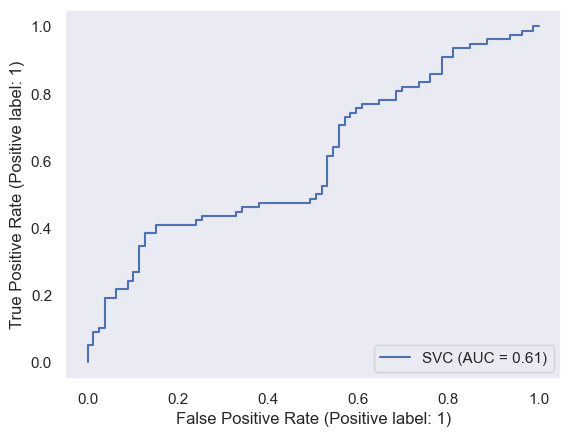

In [98]:
RocCurveDisplay.from_estimator(modelSVM_5, X_test, Y_test)

### 2.3 Evaluamos la Regresión Logística

In [109]:
y_pred_3 = modelLogistic_3.predict(X_test)

print("Informe de clasificación:")
print(classification_report(Y_test, y_pred_3))

#Matriz de confusion
conf_matrix_3 = confusion_matrix(Y_test, y_pred_3)
print("Matriz de confusión:")
print(conf_matrix_3)

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.55      0.58      0.57        79
           1       0.55      0.53      0.54        78

    accuracy                           0.55       157
   macro avg       0.55      0.55      0.55       157
weighted avg       0.55      0.55      0.55       157

Matriz de confusión:
[[46 33]
 [37 41]]


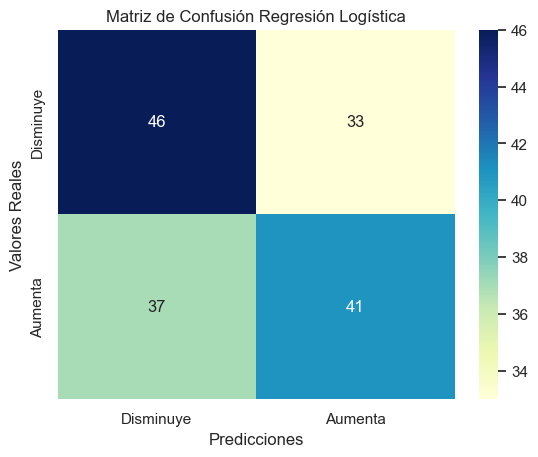

In [96]:
sns.set(font_scale=1)
sns.set_style("dark")

# 0 -> Disminuye (-)
# 1 -> Aumenta (+)

sns.heatmap(conf_matrix_3, annot=True, fmt="d", cmap="YlGnBu", cbar=True,
            xticklabels=['Disminuye', 'Aumenta'],
            yticklabels=['Disminuye', 'Aumenta'])

plt.title('Matriz de Confusión Regresión Logística')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

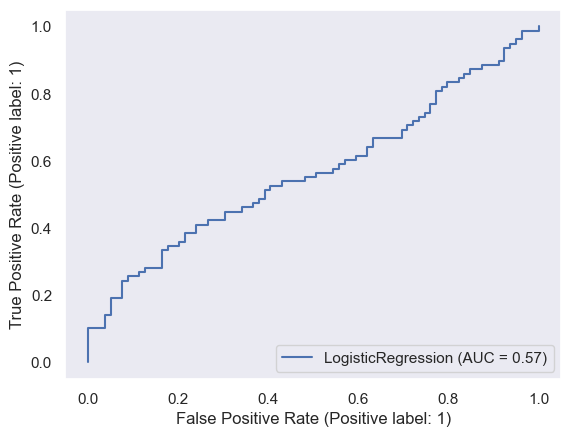

In [99]:
RocCurveDisplay.from_estimator(modelLogistic_3, X_test, Y_test)

### 2.4 Evaluamos el KNeighbors Classifier

In [110]:
y_pred_4 = modelKNN_1.predict(X_test)

print("Informe de clasificación:")
print(classification_report(Y_test, y_pred_4))

#Matriz de confusion
conf_matrix_4 = confusion_matrix(Y_test, y_pred_4)
print("Matriz de confusión:")
print(conf_matrix_4)

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.59      0.52      0.55        79
           1       0.56      0.63      0.59        78

    accuracy                           0.57       157
   macro avg       0.57      0.57      0.57       157
weighted avg       0.57      0.57      0.57       157

Matriz de confusión:
[[41 38]
 [29 49]]


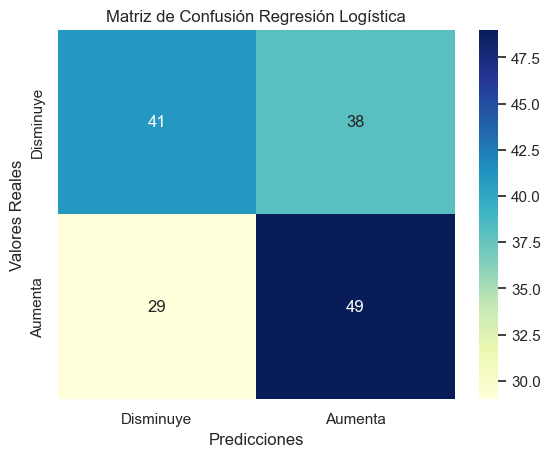

In [101]:
sns.set(font_scale=1)
sns.set_style("dark")

# 0 -> Disminuye (-)
# 1 -> Aumenta (+)

sns.heatmap(conf_matrix_4, annot=True, fmt="d", cmap="YlGnBu", cbar=True,
            xticklabels=['Disminuye', 'Aumenta'],
            yticklabels=['Disminuye', 'Aumenta'])

plt.title('Matriz de Confusión Regresión Logística')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

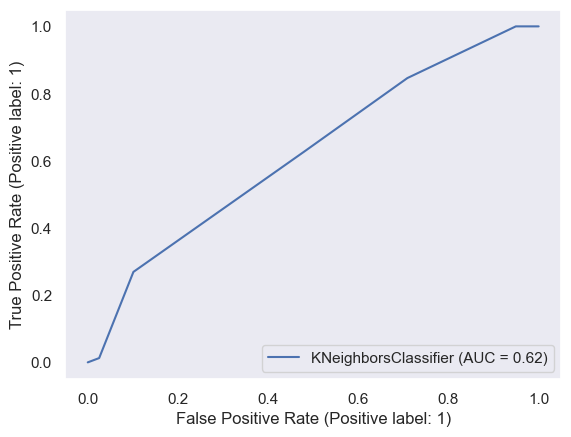

In [102]:
RocCurveDisplay.from_estimator(modelKNN_1, X_test, Y_test)

## **3. Conclusiones**


Para determinar cuál de los cuatro modelos es el mejor, basándonos en los informes de clasificación y las métricas proporcionadas, podemos comparar sus respectivos puntajes F1 y AUC (Área bajo la Curva ROC), ya que estos ofrecen una buena representación del equilibrio entre precisión y sensibilidad, y de la capacidad del modelo para distinguir entre las clases. Veamos:

Comparación de los Modelos

- Árbol de Decisión: F1-Score: Macro Avg ~0.58, AUC: 0.59

- Support Vector Machine (SVM): F1-Score: Macro Avg ~0.49, AUC: 0.61

- Regresión Logística: F1-Score: Macro Avg ~0.55, AUC: 0.57

- KNeighbors Classifier: F1-Score: Macro Avg ~0.57, AUC: 0.62

Análisis y Elección del Mejor Modelo

Mejor F1-Score: El Árbol de Decisión y el KNeighbors Classifier tienen los puntajes F1 más altos, lo que sugiere un mejor equilibrio entre precisión y sensibilidad.
Mejor AUC: El KNeighbors Classifier tiene el AUC más alto (0.62), lo que indica una mayor capacidad para diferenciar entre las clases.
Conclusión
Basándonos en estos datos, el KNeighbors Classifier parece ser el modelo más efectivo entre los cuatro. Tiene un puntaje F1 competitivo y el AUC más alto, lo que indica una buena capacidad tanto en la precisión general de la clasificación como en la discriminación entre clases.